# Car Market Price Prediction - A Rusty Bargain App

## Introduction

Used car sales service Rusty Bargain is developing an app to attract new customers. Thanks to this application, users can quickly find out the market value of their car. The best option will be to build a machine learning model that allows us to predict the price of the vehicle. for this the company gave us access to the history: technical specifications, equipment versions and prices. Based on this information, we will create a model that makes predictions based on the three interests that the company pursues: prediction quality, prediction speed, and time required for training.

### Objectives


* Develop a machine learning model that meets the goals set by Rusty Bargain: prediction quality, prediction speed, and training time.


* Train different models and adjust their hyperparameters using different gradient boosting methods.

## Data Preparation


### Importing data and libraries


We'll start by importing all the necessary libraries to build our predictive model.


In this project we will work with `Pandas`, `Numpy`, `Scikit-Learn`, `Seaborn` and `Matplotlib` which will allow us to read files, build graphs and develop machine learning models.


We'll also work with gradient boost methods, so we'll install the `XGBoost`, `LightGBM` and `CatBoost` libraries.

In [1]:
# installing the XGBoost model library
!pip install xgboost

In [2]:
# installing the CatBoost model library
!pip install catboost

In [3]:
# installing the LightGBM model library
!pip install lightgbm

In [4]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from statistics import mode
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### Initial data exploration


Now let's read the file that contains the information needed to create our predictive model. For this we will use the `read_csv` function of pandas and pass the address of the file as an argument. Let's save our dataset as `df`.

In [5]:
df = pd.read_csv('/datasets/car_data.csv')

We will do an initial exploration of the data that was previously imported. Rusty Bargain gave us access to the sales history, in which we can find the following information:

**Characteristics**

- `DateCrawled` — date the profile was downloaded from the database
- `VehicleType` — vehicle body type
- `RegistrationYear` — vehicle registration year
- `Gearbox` — type of gearbox
- `Power` — power (CV)
- `Model` — vehicle model
- `Mileage` — mileage (measured in km according to the regional specifics of the dataset)
- `RegistrationMonth` — vehicle registration month
- `FuelType` — type of fuel
- `Brand` — vehicle brand
- `NotRepaired` — vehicle with or without repair
- `DateCreated` — profile creation date
- `NumberOfPictures` — number of photos of the vehicle
- `PostalCode` — profile owner (user) postal code
- `LastSeen` — date the user was last active

**Goal**
- `Price` — price (in euros)

We will now call the shape attribute and the head and info methods to better analyze the data we will work with. Next, we will analyze the presence of missing and duplicate values, for this we will call the isna and sum method.

In [6]:
# knowing the size of our database
df.shape

(354369, 16)

In [7]:
# viewing and parsing the first lines
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [8]:
# knowing basic information of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [9]:
# identifying exact amounts of missing values
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [10]:
# identifying the number of duplicate lines
df.duplicated().sum()

262

Our dataset has 354,369 rows and 16 columns, of which 15 correspond to the characteristics and one to the objective of our model, the price of the vehicle.

When performing an exploratory analysis of our dataset, we found some issues that need to be corrected for the development of our models:

* First of all, we can see that the column names are in uppercase letters, so it will be necessary to change them to lowercase letters, following the rules of good programming style.


* Missing values can be seen in five of the columns, these values need to be further analyzed to determine if there is any underlying pattern related to them.


* We can see that the column types `DateCrawled`, `DateCreated` and `LastSeen` are found as object types, it's better to turn them into datetime types.


* Finally, we found 262 duplicate values that need to be removed.

### Data visualization

Having established the main errors within the data set, let's explore the categorical and numerical characteristics to observe the distribution of our data. We will store the discrete variables in `categorical_data` and the continuous variables in `numeric_data`, later we will bring bar charts for each group of variables or characteristics.

We will not consider date characteristics, since they are found as an object type.

Next, we will present the categories of each variable and count their unique values, thus, by reducing the number of categories, we will better visualize the results.

In [11]:
# storing the discrete variables in the categorical_data variable
categorical_data = df[['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']]

# checking the unique values of each column with the nunique method
for col in categorical_data:
     print(f'{col}: {categorical_data[col].nunique()}')

VehicleType: 8
Gearbox: 2
Model: 250
FuelType: 7
Brand: 40
NotRepaired: 2


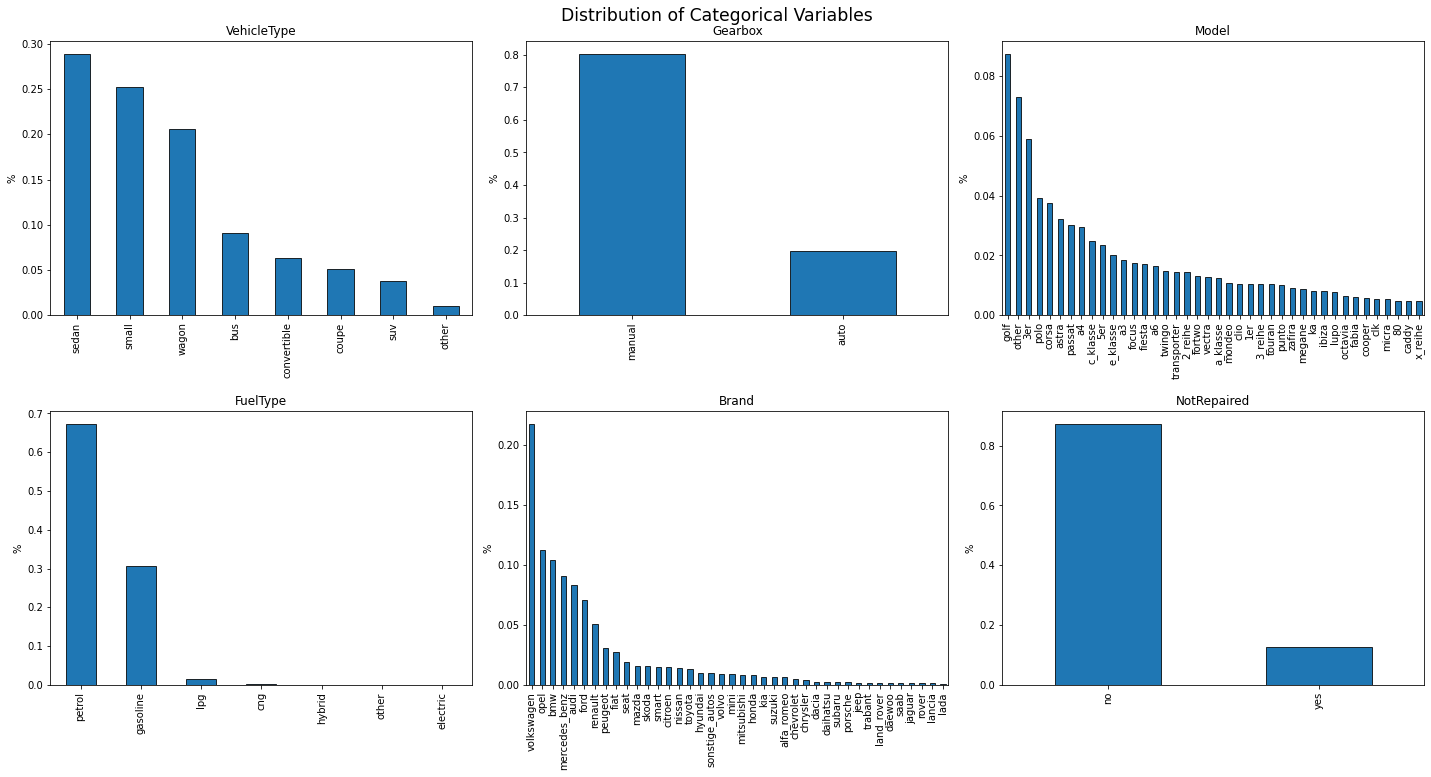

In [12]:
# defining the number of rows and columns for our subplots
a = 3 # number of rows
b = 3 # number of columns
c = 1 # graph count initialization

# defining figure size for subplots
fig = plt.subplots(figsize=(20, 15)) 

# building a for loop that will iterate through each categorical column and create a bar chart
for i in categorical_data:
    plt.subplot(a, b, c) 
    plt.title(i)
    plt.ylabel('%')
    df[i].value_counts(normalize=True).head(40).plot(kind='bar', title=i, rot=90, edgecolor='black', linewidth=0.8)
    c = c + 1

plt.suptitle('Distribution of Categorical Variables', fontsize='xx-large')
plt.tight_layout()
plt.show()


When analyzing the categorical characteristics, we can identify eight types of vehicles, with a higher proportion of sedans (approximately 30%). As for the type of transmission, there are two types: manual and automatic, with manual transmission being predominant (about 80%). Regarding the vehicle model, it is observed that more than 80% of the cars are Golf models, out of the 250 registered models.

With regard to the type of fuel, there is a greater proportion of gasoline and diesel vehicles, with around 70% for the first and 30% for the second. It's important to mention that "Gasoline" is known as "Gasoline" in the UK, so we should group these categories together. Furthermore, the brands with the highest number of online advertisements are Volkswagen (over 20%), followed by Opel (over 10%) and BMW (around 10%). Finally, more than 80% of vehicles have repairs done, while the other 20% have no repair records.

It is important to note that features such as "VehicleType", "Gearbox", "Model", "FuelType" and "NotRepaired" have missing values, which will be analyzed later.

Now, let's call the "describe" method and create frequency histograms to better understand the distribution of our continuous variables.

In [13]:
# describing statistical data of numeric variables
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


* **Regarding price**, we can observe an average of 4416 dollars and a median of 2700 dollars, indicating a positive asymmetry of the data. This is corroborated by analyzing the histogram, which demonstrates a strong positive asymmetry in price values. This suggests a high proportion of zero or close to zero values, which is also related to the high standard deviation. These values may be associated with users not entering the price of the vehicle, in order for buyers to contact the seller directly. It will be necessary to correctly process these zero values before building our predictive model.


* **Regarding the vehicle registration year**, the average is 2004 and the median is 2003, which indicates that there are more vehicles registered in those years. However, there are inconsistent values, with a minimum of 1000 and a maximum of 9999. Considering that the first vehicle was created in 1886, it will be necessary to filter out these extreme values and work only with vehicles up to 130 years old.


* **Power (in horsepower)** is around 110 hp, with a median of 105 hp, indicating a positive asymmetry. Also evident is the presence of inconsistent values that reach 20000 hp, while the most powerful car registered reaches 1825 hp (Bugatti Bolide). You will need to analyze these values and decide what to do with them.


* **Average mileage** is 128211, with a median of 150000, indicating negative data skewness. This is evident when analyzing the histogram, with a greater number of vehicles over 140,000 km. In addition, inconsistent values of zero are observed in the vehicle's registration month, which is related to the fact that the user did not provide this information.


* Finally, no extraneous values were recorded in **postcodes**, but it will be necessary to consider whether these characteristics will help in the construction of our model.

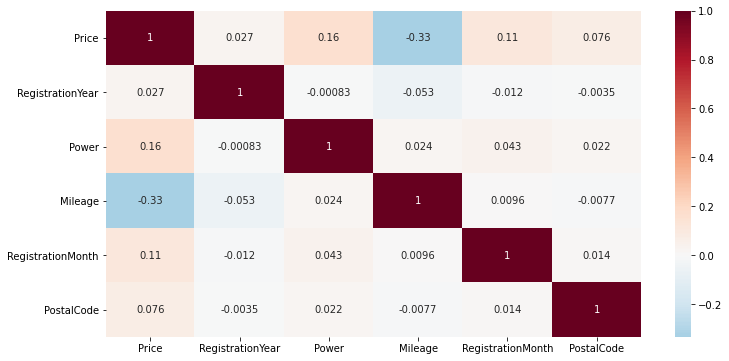

In [14]:
# dropping the NumberOfPictures column with the drop function
df = df.drop(['NumberOfPictures'], axis=1)

# plotting a correlation heatmap plot
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="RdBu_r", center=0)
plt.show()


* We observed a **moderate negative correlation between mileage and vehicle price**, that is, the higher the vehicle price, the lower the mileage.


* It is also possible to notice a **slight positive correlation between price and power**, indicating that more expensive vehicles tend to have more power.


* There is no strong linear correlation between the other numerical characteristics, as they all have a Pearson correlation close to zero. This suggests that **if there is a relationship between them, it is not linear**.

### Conclusions


* **Column names** are in uppercase, so they must be corrected to follow good programming practice rules.


* The **data type** of the `DateCrawled`, `DateCreated` and `LastSeen` columns is "object", and it would be correct to convert them to the "datetime" data type.


* There are **missing values** in five columns: `VehicleType`, `Gearbox`, `Model`, `FuelType` and `NotRepaired`. These missing values need to be analyzed to determine if there is a pattern that allows you to impute them later.


* It is necessary to **merge the categories "petrol" and "gasoline"** into a single category, as both refer to gasoline.


* The `NumberOfPictures` column contains **only zero values**, so we decided to remove it from the dataset.


* The `Price`, `RegistrationYear` and `Power` features **presented anomalies** that need to be analyzed and treated correctly before building our model. These inconsistencies are:

     - Price values equal to zero.
     - Registration years from 1000 to 9999.
     - Power in horsepower from 0 and 20000.
     - Vehicle registration month equal to zero.
     - Some features, such as dates or postal codes, may not be useful for building our model, so it will be necessary to decide whether to keep them or not.

## Data Preparation


### Duplicate Values

During the exploration of the data we noticed some duplicate data, we will choose to remove them:

In [15]:
print(f'Number of duplicate values before removal: {df.duplicated().sum()}')

# removendo duplicatas
df = df.drop_duplicates().reset_index(drop=True)

print(f'Number of duplicate values after removal: {df.duplicated().sum()}')

Number of duplicate values before removal: 262
Number of duplicate values after removal: 0


### Fix Column Names

Let's correct the column names that are in capital letters. We will lowercase them and separate words with a "_" for convention and style. For this, we will use regular expressions and the functions: `str.replace`, `str.strip` and `str.lower`.

In [16]:
print("Column names before change:")
print(df.columns)

# converting the names to lowercase and adding an underscore as a word separator.
df.columns = df.columns.str.replace(r'([A-Z])', r'_\1', regex=True).str.strip('_').str.lower()

print("\nColumn names after change:")
print(df.columns)

Column names before change:
Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Mileage', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'PostalCode', 'LastSeen'],
      dtype='object')

Column names after change:
Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'postal_code', 'last_seen'],
      dtype='object')


### Fix Data Type

Columns `date_crawled`, `date_created` and `last_seen` are presented as *objetc*, so it is necessary to convert them to *datetime* type, as they will be useful to extract important information, such as year of publication, from from which we will later calculate the year of the vehicle.

In [17]:
# storing the date columns in the variable date_columns
date_columns = df[['date_crawled', 'date_created', 'last_seen']]

# showing data types before conversion
print("\nData types before change:")
print(df[date_columns.columns].dtypes)

# building a for loop to iterate through the columns and convert them to datetime
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%d/%m/%Y %H:%M')

# showing data types after conversion
print()
print("\nData types after change:")
print(df[date_columns.columns].dtypes)


Data types before change:
date_crawled    object
date_created    object
last_seen       object
dtype: object


Data types after change:
date_crawled    datetime64[ns]
date_created    datetime64[ns]
last_seen       datetime64[ns]
dtype: object


### Missing Values

We previously noted five columns with missing values, let's calculate the percentage that each column's data represents relative to our full Dataframe.

In [18]:
nan_count = df.isna().sum()
nan_percent = 100 * df.isna().sum() / len(df)
       
nan_table = pd.concat([nan_count, nan_percent], axis=1)
nan_table.columns = ['Missing Values', '% NaN']

nan_table[nan_table.iloc[:,1] != 0]

,Missing Values,% NaN
vehicle_type,37484,10.585501
gearbox,19830,5.600002
model,19701,5.563573
fuel_type,32889,9.287871
not_repaired,71145,20.091385


#### Missing Values in "gearbox"

The gearbox type is related to the car model and its brand, so we will fill in the missing values based on the fashion of these two characteristics. It's important to note that the `model` column has missing values, so you'll need to work with a filtered dataset that doesn't have missing values in `gearbox` and `model`. Let's create a function called `fill_gearbox` that will fill in the missing values with the fashion, and if not, it will return the word `Error`.

In [19]:
# analyzing the data distribution in 'gearbox'
df['gearbox'].value_counts(dropna=False, normalize=True)

manual    0.756929
auto      0.187071
NaN       0.056000
Name: gearbox, dtype: float64

In [20]:
# filtering the dataset with no missing values in 'caixa_de_cambio' and 'model'
# and creating a pivot table that returns the mode
gearbox_without_nan = df.dropna(subset=['gearbox', 'model'])
gearbox_model = gearbox_without_nan.pivot_table(index=['brand','model'], values='gearbox', aggfunc=mode)

# creating the fill_gearbox function
def fill_gearbox(row):
    '''
    Returns the mode of the gearbox depending on the model and make of the car, if it is not possible it will throw 'Error'
    
    :param row: row with the information that needs to be filled in
    '''
    model = row['model']
    gearbox = row['gearbox']
    brand = row['brand']

    if pd.isna(gearbox):
        try:
            return gearbox_model.loc[(brand, model), 'gearbox']
        except:
            return 'Error'
    return gearbox

# checking if the function is working correctly
row_values = ['alfa_romeo', '145', np.nan]
row_columns = ['brand', 'model', 'gearbox']
row = pd.Series(data=row_values, index=row_columns)
fill_gearbox(row)

'manual'

In [21]:
# applying the function to our Dataframe
df['gearbox'] = df.apply(fill_gearbox, axis = 1)

# confirming if there are unfilled values
errors = df[df['gearbox'] == 'Error']
print(f'Errors applying the fill_model function: {len(errors)}')

Errors applying the fill_model function: 4130


Our function failed to fill 4130 values, these remaining values will be filled based on the mode of the entire column.

Let's replace it with fashion because there are only two options, manual and automatic, and the manual is presented in a larger proportion. So they will not affect the distribution of our data.

We'll use the `replace` function to change the `Error` to the fashion and verify that the changes were made correctly.

In [22]:
# replacing the wrong values with the mode
df['gearbox'] = df['gearbox'].replace('Error', mode(df['gearbox']))

# confirming the changes made
print('Number of errors in model:', len(df[df['model'] == 'Error']))
print('Percentage of unique in gearbox:')
print(df['gearbox'].value_counts(dropna=False, normalize=True))

Number of errors in model: 0
Percentage of unique in gearbox:
manual    0.807423
auto      0.192577
Name: gearbox, dtype: float64


In [23]:
nan_count = df.isna().sum()
nan_percent = 100 * df.isna().sum() / len(df)
       
nan_table = pd.concat([nan_count, nan_percent], axis=1)
nan_table.columns = ['Missing values', '% NaN']

nan_table[nan_table.iloc[:,1] != 0]

,Missing values,% NaN
vehicle_type,37484,10.585501
model,19701,5.563573
fuel_type,32889,9.287871
not_repaired,71145,20.091385


`gearbox` no longer appears in our list of fields with missing values. Great news! Let's go!

#### Missing Values in "vehicle_type"

The vehicle body type depends on the vehicle make and model, so again we will use these variables to fill in the missing values.

In [24]:
# analyzing the distribution of our data before dealing with missing values
df['vehicle_type'].value_counts(dropna=False, normalize=True)

sedan          0.258111
small          0.225223
wagon          0.183885
NaN            0.105855
bus            0.081196
convertible    0.056988
coupe          0.045599
suv            0.033863
other          0.009280
Name: vehicle_type, dtype: float64

In [25]:
# filtering the missing values in columns 'model' and 'vehicle_type' and building a pivot table
vehicletype_without_nan = df.dropna(subset=['vehicle_type', 'model'])
vehicletype_model = vehicletype_without_nan.pivot_table(index=['brand','model'], values='vehicle_type', aggfunc=mode)

# # creating the function fill_vehicle_type
def fill_vehicle_type(row):
    '''
    Returns the mode based on the model and brand of the car, if not possible, returns 'Error'
    
    :param row: row with the information that needs to be filled in
    '''
    brand = row['brand']
    model = row['model']
    vehicle_type = row['vehicle_type']
    
    if pd.isna(vehicle_type):
        try:
            return vehicletype_model.loc[(brand, model), 'vehicle_type']
        except:
            return 'Error'
    return vehicle_type

# confirming that the function worked correctly
row_values = ['alfa_romeo', '145', np.nan]
row_columns = ['brand', 'model', 'vehicle_type']
row = pd.Series(data=row_values, index=row_columns)
fill_vehicle_type(row)

'small'

In [26]:
# applying the function to our dataset
df['vehicle_type'] = df.apply(fill_vehicle_type, axis = 1)

In [27]:
# checking if there are values that were not filled in
errors = df[df['vehicle_type'] == 'Error']
print(f'Errors applying the fill_vehicle_type function: {len(errors)}')

Errors applying the fill_vehicle_type function: 6827


6827 values could not be filled in, so we will replace them with the word `unknown`, as we cannot get this value based on another variable. If we were to use column mode, it would affect how the data is distributed.

In [28]:
# replacing 'Error' values with 'unknown'
df['vehicle_type'] = df['vehicle_type'].replace('Error', 'unknown')

# confirming the changes made
print('Number of errors in vehicle_type:', len(df[df['vehicle_type'] == 'Error']))
print('Unique values in vehicle_type:')
print(df['vehicle_type'].value_counts(dropna=False, normalize=True))

Number of errors in vehicle_type: 0
Unique values in vehicle_type:
sedan          0.293838
small          0.250964
wagon          0.193882
bus            0.091811
convertible    0.057757
coupe          0.047367
suv            0.035755
unknown        0.019279
other          0.009347
Name: vehicle_type, dtype: float64


We managed to drop more than 8%, as NaN values in the `vehicle_type` column represented 10.5% and now, like *unknown*, represent less than 2% of the data.

#### Missing Values in "fuel_type"

First of all, it was mentioned earlier that the fuel types "petrol" and "gasoline" have the same meaning, the only difference being the places where they are used. "Petrol" is used in the United Kingdom and India, while "gasoline" is used in the United States. Taking this into account, it is best to group them into a single category, as they are not different fuels, but different terms for the same fuel.

In [29]:
# replacing 'petrol' with 'gasoline'
df['fuel_type'] = df['fuel_type'].replace('petrol', 'gasoline')

# checking the new data distribution
df['fuel_type'].value_counts(dropna=False, normalize=True)

gasoline    0.889050
NaN         0.092879
lpg         0.014987
cng         0.001596
hybrid      0.000658
other       0.000576
electric    0.000254
Name: fuel_type, dtype: float64

Now we will replace the missing values in `fuel_type` using a function based on the vehicle model.

In [30]:
# filtering the missing values of column 'model' and building a pivot table
fuel_without_nan = df.dropna(subset=['fuel_type', 'model'])
fuel_model = fuel_without_nan.pivot_table(index=['model'], values='fuel_type', aggfunc=mode)

# creating the fill_vehicle_type function
def fill_fuel_type(row):
    '''
    Returns the mode depending on the car model, if not possible, returns 'Error'
    
    :param row: row with the information that needs to be changed
    '''
    model = row['model']
    fuel_type = row['fuel_type']
    
    if pd.isna(fuel_type):
        try:
            return fuel_model.loc[model, 'fuel_type']
        except:
            return 'Error'
    return fuel_type

# confirming that the function worked correctly
row_values = ['100', np.nan]
row_columns = ['model', 'fuel_type']
row = pd.Series(data=row_values, index=row_columns)
fill_fuel_type(row)

'gasoline'

In [31]:
# applying the function to our Dataframe
df['fuel_type'] = df.apply(fill_fuel_type, axis = 1)

# confirming if there are unfilled values
errors = df[df['fuel_type'] == 'Error']
print(f'Errors applying the fill_fuel_type function: {len(errors)}')

Errors applying the fill_fuel_type function: 7161


The 7161 values that were not filled in by the function will be replaced by `unknown`.

In [32]:
# replacing the errors with 'unknown'
df['fuel_type'] = df['fuel_type'].replace('Error', 'unknown')

# confirming the changes made
print('Number of errors in fuel_type:', len(df[df['fuel_type'] == 'Error']))
print('Unique values in fuel_type:')
print(df['fuel_type'].value_counts(dropna=False, normalize=True))

Number of errors in fuel_type: 0
Unique values in fuel_type:
gasoline    0.961706
unknown     0.020223
lpg         0.014987
cng         0.001596
hybrid      0.000658
other       0.000576
electric    0.000254
Name: fuel_type, dtype: float64


We got an 8% rise in gasoline-powered cars, while we have no more NaN values and the `unknown` field values represent about 2% of the data.

#### Missing Values in "model"

Let's start by filling in the missing `model` values, in this case we'll use `brand` and `registration_year` as reference variables, as the car model is directly related to the brand and certain models were released in specific years.

Let's create a `fill_model` function that helps us fill in values based on modality by brand and year of registration.

In [33]:
# filtering Dataframe with no missing values in 'model'
# and creating a dynamic table that returns the mode
model_without_nan = df.dropna(subset=['model'])
model_brand = model_without_nan.pivot_table(index=['brand', 'registration_year'], values='model', aggfunc=mode)

# creating the fill_model function
def fill_model(row):
    '''
    Returns the mode according to the make and year of registration of the car, if not possible, returns 'Error'
    
    :param row: row with the information that needs to be filled in
    '''
    model = row['model']
    registration_year = row['registration_year']
    brand = row['brand']
    
    if pd.isna(model):
        try:
            return model_brand.loc[(brand, registration_year), 'model']
        except:
            return 'Error'
    return model

# confirming that the function works
row_values = ['volvo', 2013, np.nan]
row_columns = ['brand', 'registration_year', 'model']
row = pd.Series(data=row_values, index=row_columns)
fill_model(row)

'v60'

In [34]:
# applying the function to our Dataframe
df['model'] = df.apply(fill_model, axis = 1)

In [35]:
# confirming if there are unfilled values
errors = df[df['model'] == 'Error']
print(f'Errors applying the fill_model function: {len(errors)}')

Errors applying the fill_model function: 3441


When applying the `fill_model` function we obtained 3441 `Error` values, these would be models that could not be filled from their make and year of registration. Since we do not have another reference, we will replace these with the word `unknown`, as we do not know the model of these vehicles.

In [36]:
# replacing 'error' with 'unknown'
df['model'] = df['model'].replace('Error', 'unknown')

print('Error number in model:', len(df[df['model'] == 'Error']))

Error number in model: 0


This time our function was quite successful!

#### Missing Values in "not_repaired"

Whether or not a car is repaired depends on each seller, so the missing values in this column are not something that can be easily filled in based on another variable.

We could populate these values with a new category, but this time we'll create a machine learning model that predicts a vehicle's health based on all the characteristics in the dataset.

We will start by transforming this categorical feature into a numeric feature, for this we will create a dictionary and then use the map function to replace no = 0 and yes = 1.

In [37]:
# creating a dictionary that stores the numeric equivalences of 'yes' and 'no'
not_repaired_dict = {'no': 0, 'yes': 1}

# using the map function for the not_repaired column
df['not_repaired'] = df['not_repaired'].map(not_repaired_dict)

# confirming the exchanges
df['not_repaired'].value_counts(dropna=False, normalize=True)

0.0    0.697323
NaN    0.200914
1.0    0.101763
Name: not_repaired, dtype: float64

20% of the data is missing. Let's now build a Logistic Regression model that predicts whether or not a vehicle was repaired, and fill in our missing values based on the predictions. We start by coding the categorical features using One-Hot coding.

In [38]:
# applying 'OHE' to our Dataframe through the 'get_dummies' function
df_ohe = pd.get_dummies(df, drop_first=True)

# confirming that the swaps worked
df_ohe.head(4)

,date_crawled,price,registration_year,power,mileage,registration_month,not_repaired,date_created,postal_code,last_seen,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
0,2016-03-24 11:52:00,480,1993,0,150000,0,NaN,2016-03-24,70435,2016-04-07 03:16:00,...,0,0,0,0,0,0,0,0,1,0
1,2016-03-24 10:58:00,18300,2011,190,125000,5,1.0,2016-03-24,66954,2016-04-07 01:46:00,...,0,0,0,0,0,0,0,0,0,0
2,2016-03-14 12:52:00,9800,2004,163,125000,8,NaN,2016-03-14,90480,2016-04-05 12:47:00,...,0,0,0,0,0,0,0,0,0,0
3,2016-03-17 16:54:00,1500,2001,75,150000,6,0.0,2016-03-17,91074,2016-03-17 17:40:00,...,0,0,0,0,0,0,0,0,1,0


Apparently it worked. Now we will train our logistic regression model. We will not use dates to make the prediction as they are not important variables and their date and time format does not work in model building.

In [39]:
# creating a dataset with no missing values in 'not_repaired'
# and another one with just the missing values
nan_df_ohe = df_ohe[df_ohe['not_repaired'].isna()]
no_nan_df_ohe = df_ohe[~df_ohe['not_repaired'].isna()]

# building our linear regression model
# based on our encoded Dataframe with no missing values
lr_nan = LogisticRegression(random_state=12345, solver='liblinear')
lr_nan.fit(no_nan_df_ohe.drop(columns=['not_repaired', 'date_crawled', 'date_created', 'last_seen']),
            no_nan_df_ohe['not_repaired'])

# filling in the missing values with the predictions made by our model
df['not_repaired'].fillna(pd.Series
                          (lr_nan.predict(nan_df_ohe.drop(columns=['not_repaired', 'date_crawled', 'date_created', 'last_seen'])),
                            index=nan_df_ohe.index),
                           inplace=True)

# transforming the data to integer values
df['not_repaired'] = df['not_repaired'].astype('int')

# commit the changes
df['not_repaired'].value_counts(dropna=False, normalize=True)

0    0.898189
1    0.101811
Name: not_repaired, dtype: float64

Virtually almost all NaN values have joined the group of cars that have already been fixed, we continue with 10% not repaired and we have increased 20% (to 89%) those that have been.

Finally, we verify that there are no more missing values in our Dataframe. All fields with 354107 non-null values.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354107 entries, 0 to 354106
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354107 non-null  datetime64[ns]
 1   price               354107 non-null  int64         
 2   vehicle_type        354107 non-null  object        
 3   registration_year   354107 non-null  int64         
 4   gearbox             354107 non-null  object        
 5   power               354107 non-null  int64         
 6   model               354107 non-null  object        
 7   mileage             354107 non-null  int64         
 8   registration_month  354107 non-null  int64         
 9   fuel_type           354107 non-null  object        
 10  brand               354107 non-null  object        
 11  not_repaired        354107 non-null  int64         
 12  date_created        354107 non-null  datetime64[ns]
 13  postal_code         354107 no

### Outliers and New Columns

When performing an initial data scan, unusual values were observed in some columns of the dataset: `price`, `registration_year`, `power`, `registration_month`. Let's look at each of these values and decide how to process them. We are going to draw boxplots that allow us to visualize these outliers and inconsistent values in our dataset, for that we are going to create the function `boxplot_function`.

In [44]:
def boxplot_function(df, column, ylim=(0,0)):
    """
    Returns a boxplot with its interquartile ranges
    
    :param df: dataset name
    :param size: column name as string
    :param seed: bounds of the y-axis of the graph

    """
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR = Q3 - Q1

    df.boxplot(column)
    plt.ylim(ylim)
    plt.hlines(y=[(Q1-1.5*IQR),(Q3+1.5*IQR)], xmin=0.9, xmax=1.1, color='red')
    plt.show()

#### Outliers in "registration_year"

Let's apply the `boxplot_function` to the `registration_year` column and define the dates most users registered.

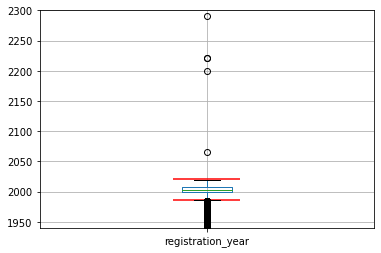

In [46]:
# creating a boxplot with upper and lower bounds
boxplot_function(df, 'registration_year', (1940, 2300))

In [47]:
print(f'''Oldest record date: {df['date_created'].min()}

Most recent registration date: {df['date_created'].max()}

Number of years covered by the data: {df['date_created'].dt.year.max() - df['date_created'].dt.year.min()}''')

Oldest record date: 2014-03-10 00:00:00

Most recent registration date: 2016-04-07 00:00:00

Number of years covered by the data: 2


In our box plot we can observe outliers with years of registration above 2060 and below 1900. Considering that the car was invented in the year 1886 and that the data records are until the year 2016. We will only consider the data that are located between 1900 and 2016.

Since we cannot override or predict year of enrollment based on other variables, we will **filter** our dataset based on these values and **will use this filter going forward**.

In [48]:
# filtering our Dataframe
df_filtered = df.query('1900 <= registration_year <= 2016')

# committing the changes
df_filtered['registration_year'].describe()

count    339512.000000
mean       2002.481859
std           7.091857
min        1910.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2016.000000
Name: registration_year, dtype: float64

In [49]:
print(f'Percentage of values eliminated: {(len(df) - len(df_filtered))*100/len(df)}')
print()
print(f'Filtered Dataframe Size in registration_year: {len(df_filtered)}')

Percentage of values eliminated: 4.121635550836329

Filtered Dataframe Size in registration_year: 339512


#### Outliers in "price"

'Zero' values were registered in the sales price of the vehicle, this is related to those sellers who prefer that the buyer contact them directly, not putting the price of the vehicle.

Let's apply our `boxplot_function` to the price column and let's look at the distribution data to make a better decision.

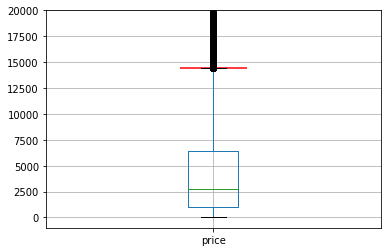

In [50]:
# creating a boxplot with upper and lower bounds
boxplot_function(df, 'price', (-1000, 20000))

In the boxplot, a positive asymmetry, already mentioned above, is observed, which is related to the high number of values close to zero in our data set.

Since we will be building our model to predict these values, we will eliminate vehicles priced less than $99 as they have extraneous attributes that will affect our model.

In [51]:
# filtering our Dataframe
df_filtered = df_filtered.query('99 <= price')

# committing the changes
df_filtered['price'].describe()

count    327172.000000
mean       4639.560433
std        4546.098270
min          99.000000
25%        1200.000000
50%        2950.000000
75%        6700.000000
max       20000.000000
Name: price, dtype: float64

Interesting that our outliers were concentrated downwards and we didn't have exorbitant and unexpected maximum values for cars.

Let's confirm how much we already had to give up in our Dataframe:

In [52]:
print(f'Percentage of values eliminated in the price section: {(339512 - len(df_filtered))*100/339512}')
print()
print(f'Percentage of abnormal values eliminated in total: {(len(df) - len(df_filtered))*100/len(df)}')

Percentage of values eliminated in the price section: 3.6346285256485777

Percentage of abnormal values eliminated in total: 7.606457935030937


#### Outliers in "power"

Now we will see the outliers in the `power` column that registered a maximum value of 20000hp and minimum values of 0hp, which are strange values for power in vehicles. We will apply our `boxplot_function` function to this column.

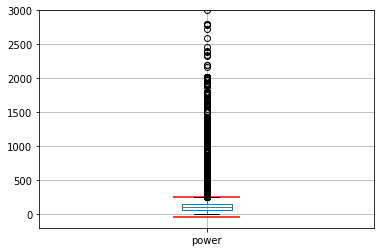

In [54]:
# creating boxplot to analyze car power data
boxplot_function(df, 'power', (-200, 3000))

By analyzing our box plot we can see outliers close to zero and above 3000hp.

We must consider that the minimum power value for a vehicle is 60hp and that the maximum can reach up to 1800hp.

We'll fill all the lower power values with NaN and then explore the possibility of substituting them based on other variables.

As for the values above 2000hp, we will remove them as they constitute outliers.

In [55]:
# removing from our Dataframe df_filtered the values greater than 2000cv
df_filtered = df_filtered.query('power <= 2000')

# replacing the values with power below 50hp by NaN
df_filtered.loc[df_filtered['power'] < 50, 'power'] = np.nan

# committing the changes
df_filtered['power'].describe()

count    290012.000000
mean        123.021723
std          62.829852
min          50.000000
25%          80.000000
50%         115.000000
75%         150.000000
max        2000.000000
Name: power, dtype: float64

In [56]:
nan_power = df_filtered[df_filtered['power'].isna()]
print(f'Percentage of unexpected values replaced by Nan: {nan_power.shape[0]/len(df_filtered)*100}')
print()
print(f'Percentage of outliers removed in total: {(len(df) - len(df_filtered))*100/len(df)}')
print()
print(f'Filtered dataset size: {len(df_filtered)}')

Percentage of unexpected values replaced by Nan: 11.330567369164493

Percentage of outliers removed in total: 7.634980387284069

Filtered dataset size: 327071


We can see a high percentage of cars listed with less than 50hp (which we've substituted for NaN values), so we'll populate them based on vehicle model.

In [57]:
# creating a filtered Dataframe with no missing values in 'power'
# and building a pivot table grouped by model
power_no_missing_values = df_filtered.dropna(subset=['power'])
power_model = power_no_missing_values.pivot_table(index=['model'], values='power', aggfunc='median')

# creating the fill_power function
def fill_power(row):
    '''
    Returns the median based on the car model, if not possible, returns 'Error'
    
    :param row: row with the information that needs to be filled in
    '''
    model = row['model']
    power = row['power']
    
    if pd.isna(power):
        try:
            return power_model.loc[model, 'power']
        except:
            return 'Error'
    return power

# confirming that the function works
row_values = ['100', np.nan]
row_columns = ['model', 'power']
row = pd.Series(data=row_values, index=row_columns)
fill_power(row)

133.0

In [58]:
# applying the function to our Dataframe
df_filtered['power'] = df_filtered.apply(fill_power, axis = 1)

In [59]:
# confirming if there are unfilled values
df_filtered[df_filtered['power'] == 'Error']

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,postal_code,last_seen
234175,2016-03-30 11:39:00,3800,wagon,1978,manual,Error,serie_1,30000,0,gasoline,land_rover,0,2016-03-30,49824,2016-03-30 11:39:00


One of the power values was not filled in correctly, this corresponds to the Land Rover 1 series vehicle. The power of this make and model of vehicle is 50hp, so we will fill this NaN value with the consulted information and we will convert the whole column to integer type.

In [60]:
# replacing the power value corresponding to the Land Rover Series 1
df_filtered.loc[df_filtered['power'] == 'Error', 'power'] = 50

# converting the column to integer type
df_filtered['power'] = df_filtered['power'].astype('int')

# confirming the results
print('Number of errors in power:', len(df_filtered[df_filtered['power'] == 'Error']))
print()
print(df_filtered['power'].describe())

print()

print(f'Percentage of abnormal values eliminated in total: {(len(df) - len(df_filtered))*100/len(df)}')

Number of errors in power: 0

count    327071.000000
mean        120.832834
std          60.931922
min          50.000000
25%          75.000000
50%         110.000000
75%         147.000000
max        2000.000000
Name: power, dtype: float64

Percentage of abnormal values eliminated in total: 7.634980387284069


At least the `power` data didn't cause enough decrease in our data count.

#### Outliers in "registration_month"

When exploring the initial dataset, we found zero values for the vehicle's registration month, which may be related to the fact that the seller did not provide this information. So let's replace it with the column median.

In [61]:
# confirming registration_month unique values
df_filtered['registration_month'].value_counts(normalize=True)

3     0.099498
6     0.090531
0     0.086415
4     0.084141
5     0.083811
7     0.078463
10    0.075549
11    0.070025
12    0.069707
9     0.069016
1     0.066560
8     0.065029
2     0.061256
Name: registration_month, dtype: float64

We'll replace the zero values with the median of enrollment month and verify the changes by calling `value_counts`.

In [62]:
# replacing the months with 'zero' values by the median of the column
df_filtered['registration_month'] = (df_filtered['registration_month'].replace(0,
                                                                               df_filtered['registration_month'].median())
                                      .astype('int'))

# committing the changes
df_filtered['registration_month'].value_counts(normalize=True)

6     0.176946
3     0.099498
4     0.084141
5     0.083811
7     0.078463
10    0.075549
11    0.070025
12    0.069707
9     0.069016
1     0.066560
8     0.065029
2     0.061256
Name: registration_month, dtype: float64

The month of March had the most records and now we have the month of June in first place, which is even better than having removed 8% of our data.

#### Vehicle Age Calculation

Now we will add a new characteristic to our Dataframe: `car_age`. This will show the age of the car from the year in which the vehicle was registered until the year in which the user profile of this car was created on the site.

In [63]:
# calculating the age of each vehicle
df_filtered['car_age'] = df_filtered['date_created'].dt.year - df['registration_year']

# changing the age of the car to integer type
df_filtered['car_age'] = df_filtered['car_age'].astype(int)

# confirming the calculations
df_filtered['car_age'].describe()

count    327071.000000
mean         13.376888
std           6.864718
min           0.000000
25%           9.000000
50%          13.000000
75%          17.000000
max         106.000000
Name: car_age, dtype: float64

We are dealing with a data set of relatively recent cars, the majority (75%) are no more than 17 years old. We have some already selling their car in the same year of purchase and other classics with more than a century.

#### Final Dataset

Let's filter out those columns that won't be useful in building our models. In this case we will eliminate the characteristics of date, postal code and registration date, for the latter the new column `car_age` was created that presents the years of the vehicle and would be related to the year of registration of the vehicle.

In [64]:
# removing the fields that we are not interested in for the creation of our model
df_final = df_filtered.drop(['date_crawled', 'registration_year','registration_month', 'date_created', 'postal_code', 'last_seen'], axis=1)

# viewing the first rows of our machine learning-ready Dataframe
df_final.head()

,price,vehicle_type,gearbox,power,model,mileage,fuel_type,brand,not_repaired,car_age
0,480,sedan,manual,101,golf,150000,gasoline,volkswagen,0,23
1,18300,coupe,manual,190,a4,125000,gasoline,audi,1,5
2,9800,suv,auto,163,grand,125000,gasoline,jeep,0,12
3,1500,small,manual,75,golf,150000,gasoline,volkswagen,0,15
4,3600,small,manual,69,fabia,90000,gasoline,skoda,0,8


In [65]:
# checking statistical data from the numerical fields of our Dataframe
df_final.describe()

,price,power,mileage,not_repaired,car_age
count,327071.000000,327071.000000,327071.000000,327071.000000,327071.000000
mean,4639.853903,120.832834,128359.973828,0.099128,13.376888
std,4546.295861,60.931922,37257.806549,0.298835,6.864718
min,99.000000,50.000000,5000.000000,0.000000,0.000000
25%,1200.000000,75.000000,125000.000000,0.000000,9.000000
50%,2950.000000,110.000000,150000.000000,0.000000,13.000000
75%,6700.000000,147.000000,150000.000000,0.000000,17.000000
max,20000.000000,2000.000000,150000.000000,1.000000,106.000000


In [66]:
# checking basic information after our changes
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327071 entries, 0 to 354106
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         327071 non-null  int64 
 1   vehicle_type  327071 non-null  object
 2   gearbox       327071 non-null  object
 3   power         327071 non-null  int64 
 4   model         327071 non-null  object
 5   mileage       327071 non-null  int64 
 6   fuel_type     327071 non-null  object
 7   brand         327071 non-null  object
 8   not_repaired  327071 non-null  int64 
 9   car_age       327071 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 35.5+ MB


## Model Training


With the missing and outliers corrected, we'll move on to building multiple machine learning models that meet the company's dispositions. In this case, we will compare decision tree, random forest and linear regression models with gradient boosting methods: LightGBM, CatBoost and XGBoost.


In this data set, the characteristics `brand` and `model` have 40 and 250 categories respectively, so it will be necessary to take into account which coding method will be used for each model, since they would be high cardinality variables.


For example, One-Hot Encoding will be useful for our linear regression model, but it will not be useful for our tree models as they process one function at a time. For this reason, we will generate different datasets with coded and standardized features according to the learning algorithm that will be used.


We will measure the training and prediction speed of each model, and its quality will be measured through the RECM.


**Note:** The time obtained through the python time method will vary each time the kernel is run, so the values obtained will be approximate.

### Linear Regression


For linear regression, the best coding technique is OHE (One-Hot Encoding), as the categories are coded in such a way that the same importance is assigned to all, but without losing their differences. In turn, we perform the standardization of numerical characteristics through StandardScaler. We will use linear regression as our sanity test, looking for better quality gradient potentiation methods.

In [67]:
# encoding the categorical features via 'get_dummies'
df_ohe = pd.get_dummies(df_final, drop_first=True)

# setting the numerical characteristics
numeric_ohe = ['power', 'mileage', 'car_age']

# scaling the numbers
scaler = StandardScaler()
scaler.fit(df_ohe[numeric_ohe])
df_ohe[numeric_ohe] = scaler.transform(df_ohe[numeric_ohe])
df_ohe.head()

,price,power,mileage,not_repaired,car_age,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
0,480,-0.325492,0.580819,0,1.401824,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,18300,1.135157,-0.090182,1,-1.220283,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9800,0.692038,-0.090182,0,-0.200575,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1500,-0.752199,0.580819,0,0.236443,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,3600,-0.850669,-1.029584,0,-0.783265,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


We standardized the numerical variables `power`, `mileage` and `car_age`.

Now we'll divide `price` as the training objective from the rest of the Dataframe fields and assign 75% to training and 25% to testing:

In [68]:
# establishing the characteristics and purpose for the linear regression
x_ohe = df_ohe.drop('price', axis=1)
y_ohe = df_ohe['price']

# splitting training and testing sets in 75:25 ratio
x_train_ohe, x_test_ohe, y_train_ohe, y_test_ohe = train_test_split(x_ohe, y_ohe, test_size=0.25, random_state=12345)

# confirming that the data split correctly
print()
print(f'OHE training set size: {x_train_ohe.shape}, {y_train_ohe.shape}')
print()
print(f'OHE test set size: {x_test_ohe.shape}, {y_test_ohe.shape}')


OHE training set size: (245303, 308), (245303,)

OHE test set size: (81768, 308), (81768,)


The division looks good and now we will train our linear regression model, make predictions and use RMSE to evaluate the test, in addition to measuring its time:

In [69]:
# training the linear regression model
start_train = time.time()
lr_model = LinearRegression()
lr_model.fit(x_train_ohe, y_train_ohe)
end_train = time.time()

# making the predictions
start_test = time.time()
y_pred = lr_model.predict(x_test_ohe)
end_test = time.time()

train_time_lr = end_train - start_train
test_time_lr = end_test - start_test

# setting the RMSE for our proof of sanity
rmse_lr = mean_squared_error(y_test_ohe, y_pred)**0.5
print(f'Linear Regression RMSE: {rmse_lr:.3f}')
print(f'Training time: {train_time_lr:.3f}s')
print(f'Test time: {test_time_lr:.3f}s')

Linear Regression RMSE: 2844.636
Training time: 20.393s
Test time: 0.062s


The linear regression model returned a RECM of 2844, this will be our sanity test and will serve as a baseline value to compare the other models and gradient feeding methods.

If a gradient model performs worse than 2844, something has gone wrong. The training time was ≈20s and the time to make predictions was ≈0.20s.

### Decision tree

When we have features with high cardinality, we better change the encoding method. The use of OHE in variables with a large number of categories decreases the efficiency of tree-based models, as it generates very sparse decision trees with few division options, especially when it comes to only two categories in one-hot coding.

In addition, it causes the model to give more importance to those continuous features, giving less importance to categorical features and, with that, the quality and performance of the model decreases.

With all that in mind, we'll use label coding to build our tree models.

We'll use `GridsearchCV` to find the best hyperparameters, train our model, and measure training and testing time with the Python timing library.

In [70]:
# creating a copy of our 'df_final' which will contain the categories with label encoding
df_ordinal = df_final.copy()

# establishing the categorical characteristics
cat_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand']

# encoding the categorical features and confirming the exchanges
encoder = OrdinalEncoder()
encoder.fit(df_final[cat_features])
df_ordinal[cat_features] = pd.DataFrame(encoder.transform(df[cat_features]),columns=cat_features)
df_ordinal.head()

,price,vehicle_type,gearbox,power,model,mileage,fuel_type,brand,not_repaired,car_age
0,480,4.0,1.0,101,116.0,150000,2.0,38.0,0,23
1,18300,2.0,1.0,190,29.0,125000,2.0,1.0,1,5
2,9800,6.0,0.0,163,117.0,125000,2.0,14.0,0,12
3,1500,5.0,1.0,75,116.0,150000,2.0,38.0,0,15
4,3600,5.0,1.0,69,101.0,90000,2.0,31.0,0,8


We standardized the categorical variables `vehicle_type`, `gearbox`, `model`, `fuel_type` and `brand`.

Now we'll divide `price` as the training objective from the rest of the Dataframe fields and assign 75% to training and 25% to testing:

In [71]:
# splitting our Dataframe into features and purpose
x_ord = df_ordinal.drop('price', axis=1)
y_ord = df_ordinal['price']

# establishing the training and testing set
x_train_ord, x_test_ord, y_train_ord, y_test_ord = train_test_split(x_ord, y_ord, test_size=0.25, random_state=12345)

# confirming the correct division of the data
print()
print(f'Ordinal training set size: {x_train_ord.shape}, {y_train_ord.shape}')
print()
print(f'Ordinal test set size: {x_test_ord.shape}, {y_test_ord.shape}')


Ordinal training set size: (245303, 9), (245303,)

Ordinal test set size: (81768, 9), (81768,)


Great. Now that the division has been done well, we will do the:

**Adjustment of hyperparameters**

In [72]:
# setting the decision tree hyperparameters
params_dt = {
    'max_depth': [1, 2, 3, 4, 5, 6] ,
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6, 8],
}

# calling the GridSearchCV function and passing the established hyperparameters,
# the metric and value for cross validation
gridSearch_dt = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=params_dt,
    scoring='neg_root_mean_squared_error',
    cv=3
)

In [73]:
# training the model to find the best hyperparameters and counting its time
start = time.time()
gridSearch_dt.fit(x_train_ord, y_train_ord)
end = time.time()

print(f'Decision Tree hyperparameter tuning time: {end-start:.3f}s')

Decision Tree hyperparameter tuning time: 52.180s


In [74]:
# searching for the best hyperparameters that returned the lowest RMSE value
max_score = gridSearch_dt.cv_results_['mean_test_score'].max()
index_max_score = np.where(gridSearch_dt.cv_results_['mean_test_score'] == max_score)[0][0]

best_set_of_params = gridSearch_dt.cv_results_['params'][index_max_score]

print()
print("Best hyperparameters:")
print(best_set_of_params)
print()
print("Best RMSE:")
print(-max_score)


Best hyperparameters:
{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

Best RMSE:
2314.8968240567137


**Model Training**

In [75]:
# training our model with the best hyperparameters
# and performing predictions on the test set
start_train = time.time()
dt_model = DecisionTreeRegressor(random_state=12345, max_depth=6, min_samples_split=2, min_samples_leaf=2)
dt_model.fit(x_train_ord, y_train_ord)
end_train = time.time()

start_test = time.time()
y_pred_dt = dt_model.predict(x_test_ord)
end_test = time.time()

train_time_dt = end_train - start_train
test_time_dt = end_test - start_test

rmse_dt = mean_squared_error(y_test_ord, y_pred_dt)**0.5
print(f'Decision Tree RMSE: {rmse_dt:.3f}')
print(f'Training time: {train_time_dt:.3f}s')
print(f'Test time: {test_time_dt:.3f}s')

Decision Tree RMSE: 2331.312
Training time: 0.458s
Test time: 0.010s


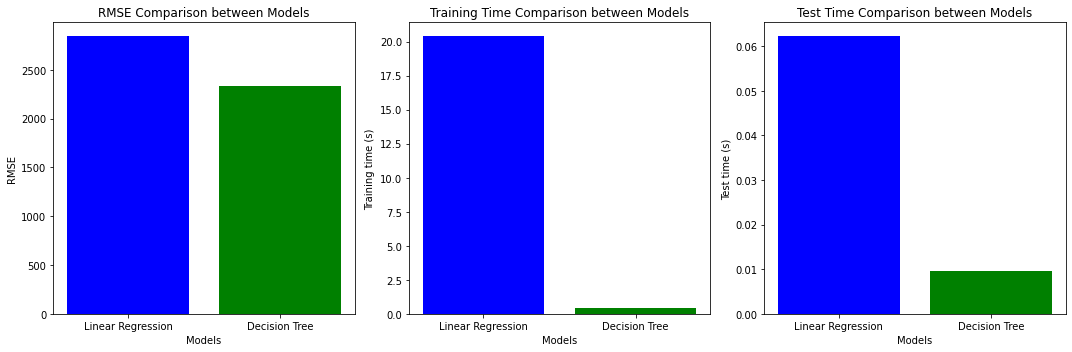

In [76]:
model_names = ['Linear Regression', 'Decision Tree']
rmse_values = [rmse_lr, rmse_dt]
train_times = [train_time_lr, train_time_dt]
test_times = [test_time_lr, test_time_dt]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# RMSE Comparison Chart
axes[0].bar(model_names, rmse_values, color=['blue', 'green'])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('RMSE')
axes[0].set_title('RMSE Comparison between Models')

# Training Time Comparison Chart
axes[1].bar(model_names, train_times, color=['blue', 'green'])
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Training time (s)')
axes[1].set_title('Training Time Comparison between Models')

# Test Time Comparison Chart
axes[2].bar(model_names, test_times, color=['blue', 'green'])
axes[2].set_xlabel('Models')
axes[2].set_ylabel('Test time (s)')
axes[2].set_title('Test Time Comparison between Models')

plt.tight_layout()
plt.show()

Based on the results obtained so far, the Decision Tree model seems to be a better choice in terms of accuracy (RMSE) and computational efficiency (training and testing time) than the Linear Regression model.

### Random Forest

As with our decision tree, in the Random Forest we will use our training and test set with ordinal encoding for categorical features.

**Adjustment of Hyperparameters**

In [77]:
# setting the values to determine the best hyperparameters
params_rf = {
    'n_estimators' : [10, 20, 40],
    'max_depth': [1, 2, 3, 4, 5, 6]
}

# calling GridSearchCV and passing the hyperparameter values...
# the RMSE metric and the cross-validation value
gridSearch_rf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=params_rf,
    scoring='neg_root_mean_squared_error',
    cv=3
)

In [78]:
# training the model to find the best hyperparameters
start = time.time()
gridSearch_rf.fit(x_train_ord, y_train_ord)
end = time.time()

print(f'Hyperparameter adjustment time in the Random Forest: {end-start:.3f}s')

Hyperparameter adjustment time in the Random Forest: 157.445s


In [79]:
# searching for the best hyperparameters
max_score = gridSearch_rf.cv_results_["mean_test_score"].max()
index_max_score = np.where(gridSearch_rf.cv_results_["mean_test_score"] == max_score)[0][0]

best_set_of_params = gridSearch_rf.cv_results_["params"][index_max_score]

print()
print("Best hyperparameters:")
print(best_set_of_params)
print()
print("Best RMSE:")
print(-max_score)


Best hyperparameters:
{'max_depth': 6, 'n_estimators': 40}

Best RMSE:
2254.762673850359


**Model Training**

In [80]:
# training the model with the best hyperparameters
# and performing predictions on the test set
start_train = time.time()
rf_model = RandomForestRegressor(random_state=12345, max_depth=6, n_estimators=40)
rf_model.fit(x_train_ord, y_train_ord)
end_train = time.time()

start_test = time.time()
y_pred_rf = rf_model.predict(x_test_ord)
end_test = time.time()

train_time_rf = end_train - start_train
test_time_rf = end_test - start_test

rmse_rf = mean_squared_error(y_test_ord, y_pred_rf)**0.5
print(f'Random Forest RMSE: {rmse_rf:.3f}')
print(f'Training time: {train_time_rf:.3f}s')
print(f'Test time: {test_time_rf:.3f}s')

Random Forest RMSE: 2271.996
Training time: 13.032s
Test time: 0.196s


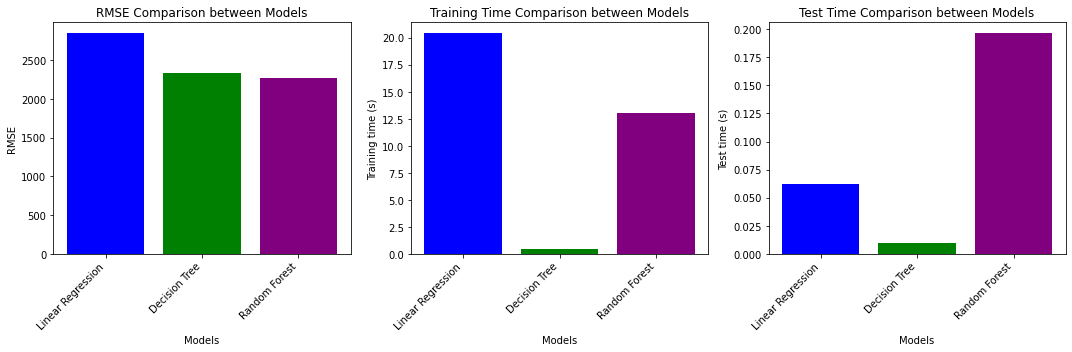

In [81]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']
rmse_values = [rmse_lr, rmse_dt, rmse_rf]
train_times = [train_time_lr, train_time_dt, train_time_rf]
test_times = [test_time_lr, test_time_dt, test_time_rf]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# RMSE Comparison Chart
rmse_bar = axes[0].bar(model_names, rmse_values, color=['blue', 'green', 'purple'])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('RMSE')
axes[0].set_title('RMSE Comparison between Models')
axes[0].set_xticks(range(len(model_names))) # Setting tick locations
axes[0].set_xticklabels(model_names, rotation=45, ha='right') # Label rotation

# Training Time Comparison Chart
train_time_bar = axes[1].bar(model_names, train_times, color=['blue', 'green', 'purple'])
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Training time (s)')
axes[1].set_title('Training Time Comparison between Models')
axes[1].set_xticks(range(len(model_names))) # Setting tick locations
axes[1].set_xticklabels(model_names, rotation=45, ha='right') # Label rotation

# Test Time Comparison Chart
test_time_bar = axes[2].bar(model_names, test_times, color=['blue', 'green', 'purple'])
axes[2].set_xlabel('Models')
axes[2].set_ylabel('Test time (s)')
axes[2].set_title('Test Time Comparison between Models')
axes[2].set_xticks(range(len(model_names))) # Setting tick locations
axes[2].set_xticklabels(model_names, rotation=45, ha='right') # Label rotation

plt.tight_layout()
plt.show()

Random Forest also performs well with respect to accuracy (RMSE), with an RMSE value of 2271,996. However, its training time is longer than Decision Tree, totaling 13.3 seconds, which is still less than Linear Regression training time. Its trial time is 0.197 seconds, slightly longer than Decision Tree.

As such, considering both accuracy and computational efficiency, the Decision Tree model remains a solid choice over Linear Regression and Random Forest for this particular dataset.

### CatBoost

CatBoost is a gradient boosting method that uses an optimized algorithm to split your trees, i.e., it will select that tree split that has the lowest penalty, regardless of how that decision contributes to the overall optimal solution of the model.

In turn, this method is based on symmetric trees that present a consistent division of nodes at the same depth of the tree. And the most important thing about this algorithm is that it does not require preprocessing of categorical features, so there is no need to apply OHE or label encoding as the method itself assigns labels through the use of permutations of the dataset.

So we will work directly with our final `df_final` dataset and pass a list of categorical `cat_features` features when training the model.

In [82]:
# setting the characteristics and goals from 'df_final'
x = df_final.drop('price', axis=1)
y = df_final['price']

# splitting the training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12345)

# confirming the correct division of the data
print(f'Training set size: {x_train.shape}, {y_train.shape}')
print(f'Test set size: {x_test.shape}, {y_test.shape}')

Training set size: (245303, 9), (245303,)
Test set size: (81768, 9), (81768,)


**Adjustment of Hyperparameters**

In [83]:
# defining the categorical characteristics
cat_features = ['vehicle_type',
                'gearbox',
                'model',
                'fuel_type',
                'brand']

# establishing the hyperparameters that we are going to adjust
params_catboost = {
    'depth': [4, 6, 10],
    'learning_rate': [0.1, 0.2, 0.5]
}

# calling the estimator we will use
# in this case the CatBoostRegressor and passing the GridSearchCv
catboost_est = CatBoostRegressor(iterations=100, cat_features=cat_features, verbose=False, loss_function='RMSE')

gridSearch_catboost = GridSearchCV(
    estimator=catboost_est,
    param_grid=params_catboost,
    scoring='neg_root_mean_squared_error',
    cv=3
)

# training the model in search of hyperpermeters with less RMSE
start = time.time()
gridSearch_catboost.fit(x_train, y_train)
end = time.time()
print(f'CatBoost hyperparameter tuning time: {end-start:.3f}s')

CatBoost hyperparameter tuning time: 378.819s


In [84]:
# searching for the best hyperparameters
max_score = gridSearch_catboost.cv_results_["mean_test_score"].max()
index_max_score = np.where(gridSearch_catboost.cv_results_["mean_test_score"] == max_score)[0][0]

best_set_of_params = gridSearch_catboost.cv_results_["params"][index_max_score]

print()
print("Best hyperparameters:")
print(best_set_of_params)
print("Best RMSE:")
print(-max_score)


Best hyperparameters:
{'depth': 10, 'learning_rate': 0.5}
Best RMSE:
1677.884267168148


**Model Training**

In [85]:
# Training our model with the best hyperparameters
# and making predictions with the test set
catboost_model = CatBoostRegressor(iterations=100,
                                  depth=10,
                                  learning_rate=0.5,
                                  loss_function='RMSE',
                                  random_seed=12345)

start_train = time.time()
catboost_model.fit(x_train, y_train, cat_features=cat_features, verbose=False)
end_train = time.time()

start_test = time.time()
y_pred_cat = catboost_model.predict(x_test)
end_test = time.time()

train_time_cb = end_train - start_train
test_time_cb = end_test - start_test

rmse_catboost = mean_squared_error(y_test, y_pred_cat)**0.5
print(f'RECM CatBoost: {rmse_catboost:.3f}')
print(f'Training time: {train_time_cb:.3f}s')
print(f'Test time: {test_time_cb:.3f}s')

RECM CatBoost: 1648.352
Training time: 29.768s
Test time: 0.151s


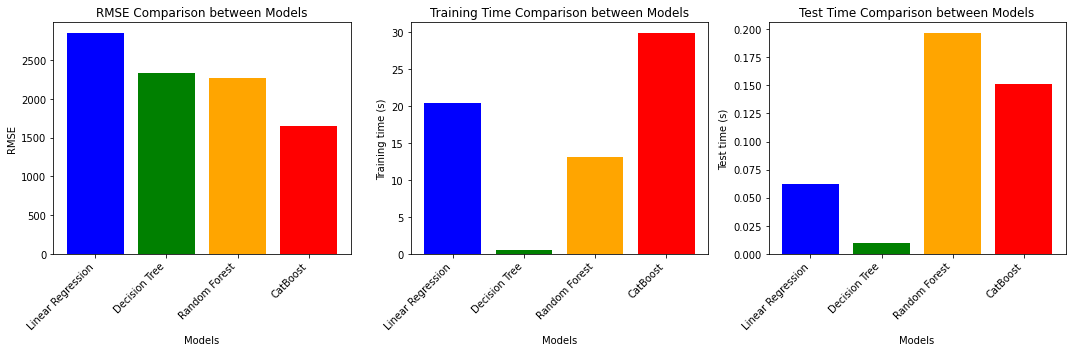

In [86]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'CatBoost']
rmse_values = [rmse_lr, rmse_dt, rmse_rf, rmse_catboost]
train_times = [train_time_lr, train_time_dt, train_time_rf, train_time_cb]
test_times = [test_time_lr, test_time_dt, test_time_rf, test_time_cb]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# RMSE Comparison Chart
rmse_bar = axes[0].bar(model_names, rmse_values, color=['blue', 'green', 'orange', 'red'])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('RMSE')
axes[0].set_title('RMSE Comparison between Models')
axes[0].set_xticks(range(len(model_names))) # Setting tick locations
axes[0].set_xticklabels(model_names, rotation=45, ha='right') # Label rotation

# Training Time Comparison Chart
train_time_bar = axes[1].bar(model_names, train_times, color=['blue', 'green', 'orange', 'red'])
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Training time (s)')
axes[1].set_title('Training Time Comparison between Models')
axes[1].set_xticks(range(len(model_names))) # Setting tick locations
axes[1].set_xticklabels(model_names, rotation=45, ha='right') # Label rotation

# Test Time Comparison Chart
test_time_bar = axes[2].bar(model_names, test_times, color=['blue', 'green', 'orange', 'red'])
axes[2].set_xlabel('Models')
axes[2].set_ylabel('Test time (s)')
axes[2].set_title('Test Time Comparison between Models')
axes[2].set_xticks(range(len(model_names))) # Setting tick locations
axes[2].set_xticklabels(model_names, rotation=45, ha='right') # Label rotation

plt.tight_layout()
plt.show()

So far we got:

* The CatBoost model had the lowest RMSE among the evaluated models, with an RMSE value of 1648,352, demonstrating a high accuracy in predicting car prices.


* Random Forest also performed well in terms of RMSE, with a value of 2271,996, although slightly lower than CatBoost.


* In terms of computational efficiency, the Decision Tree remains the fastest model in both training and testing time, with values of 0.393s and 0.009s, respectively.


* Linear Regression, despite being a simpler method, has a significantly higher RMSE (2844.636) and a longer training time (18.924s) compared to the other models.

### LightGBM

The LightGBM gradient enhancement method uses asymmetric trees and relies on tree calculations, so it splits the tree leaf with the best fit, thus producing greater accuracy and decreasing errors that can occur when using levels per calculation.

Like Catboost, it can process categorical features, but it doesn't use one-hot encoding. It is necessary to previously transform the characteristics to an integer type, as it does not accept variables of type string or object. Let's then change the categorical features to the `category` type, which is what we'll do next to train our model.

In [87]:
# transforming categorical characteristics into 'category' type
for feature in cat_features:
    df_final[feature] = df_final[feature].astype('category')
    
# establishing the characteristics and objective from the 'df_final'
x_gbm = df_final.drop('price', axis=1)
y_gbm = df_final['price']

# split into training and test sets
x_train_gbm, x_test_gbm, y_train_gbm, y_test_gbm = train_test_split(x_gbm, y_gbm, test_size=0.25, random_state=12345)

# confirm the division
print(f'Training set size: {x_train_gbm.shape}, {y_train_gbm.shape}')
print(f'Test set size: {x_test_gbm.shape}, {y_test_gbm.shape}')

Training set size: (245303, 9), (245303,)
Test set size: (81768, 9), (81768,)


**Adjustment of Hyperparameters**

In [88]:
# setting the hyperparameters we are going to compare
params_lightgbm = {
    'n_estimators': [200, 300],
    'learning_rate': [0.1, 0.2],
    'num_leaves': [15, 20]
}

# setting the estimator we will use and calling the GridSearchCV function
lightgbm_est = LGBMRegressor()

gridSearch_lightgbm = GridSearchCV(
    estimator=lightgbm_est,
    param_grid=params_lightgbm,
    scoring='neg_root_mean_squared_error',
    cv=3
)

# training our model in the search for the best parameters
start = time.time()
gridSearch_lightgbm.fit(x_train_gbm, y_train_gbm)
end = time.time()
print(f'LightGBM hyperparameter tuning time: {end-start:.3f}s')

LightGBM hyperparameter tuning time: 152.879s


In [89]:
# fetching the best model hyperparameters
max_score = gridSearch_lightgbm.cv_results_["mean_test_score"].max()
index_max_score = np.where(gridSearch_lightgbm.cv_results_["mean_test_score"] == max_score)[0][0]

best_set_of_params = gridSearch_lightgbm.cv_results_["params"][index_max_score]

print()
print("Best hyperparameters:")
print(best_set_of_params)
print()
print("Best RMSE:")
print(-max_score)


Best hyperparameters:
{'learning_rate': 0.2, 'n_estimators': 300, 'num_leaves': 20}

Best RMSE:
1640.0575980456586


**Training the Model**

In [90]:
# training our model with the best hyperparameters
# and performing predictions on the test set
lightgbm_model = LGBMRegressor(n_estimators=300,
                                  learning_rate=0.2,
                                  num_leaves=20,
                                  random_state=12345)

start_train = time.time()
lightgbm_model.fit(x_train_gbm, y_train_gbm)
end_train = time.time()

start_test = time.time()
y_pred_gbm = lightgbm_model.predict(x_test_gbm)
end_test = time.time()

train_time_lg = end_train - start_train
test_time_lg = end_test - start_test

rmse_lightgbm = mean_squared_error(y_test_gbm, y_pred_gbm)**0.5
print(f'RMSE LightGBM: {rmse_lightgbm:.3f}')
print(f'Training time: {train_time_lg:.3f}s')
print(f'Test time: {test_time_lg:.3f}s')

RMSE LightGBM: 1616.837
Training time: 6.212s
Test time: 1.808s


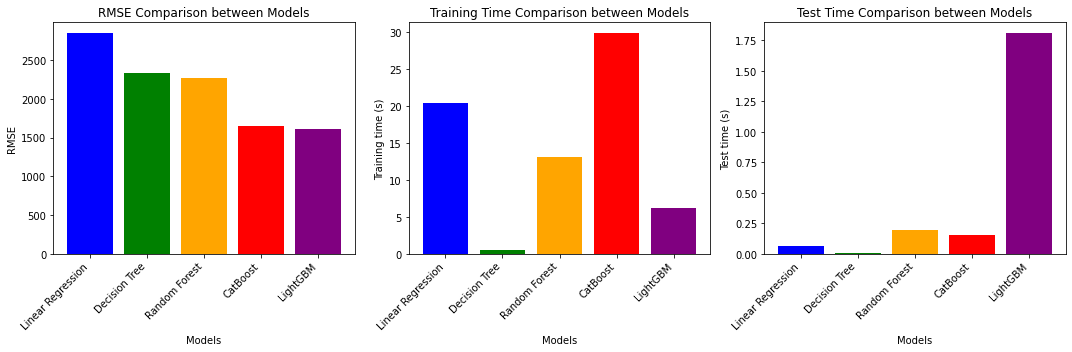

In [91]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'CatBoost', 'LightGBM']
rmse_values = [rmse_lr, rmse_dt, rmse_rf, rmse_catboost, rmse_lightgbm]
train_times = [train_time_lr, train_time_dt, train_time_rf, train_time_cb, train_time_lg]
test_times = [test_time_lr, test_time_dt, test_time_rf, test_time_cb, test_time_lg]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# RMSE Comparison Chart
rmse_bar = axes[0].bar(model_names, rmse_values, color=['blue', 'green', 'orange', 'red', 'purple'])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('RMSE')
axes[0].set_title('RMSE Comparison between Models')
axes[0].set_xticks(range(len(model_names))) # Setting tick locations
axes[0].set_xticklabels(model_names, rotation=45, ha='right') # Label rotation

# Training Time Comparison Chart
train_time_bar = axes[1].bar(model_names, train_times, color=['blue', 'green', 'orange', 'red', 'purple'])
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Training time (s)')
axes[1].set_title('Training Time Comparison between Models')
axes[1].set_xticks(range(len(model_names))) # Setting tick locations
axes[1].set_xticklabels(model_names, rotation=45, ha='right') # Label rotation

# Test Time Comparison Chart
test_time_bar = axes[2].bar(model_names, test_times, color=['blue', 'green', 'orange', 'red', 'purple'])
axes[2].set_xlabel('Models')
axes[2].set_ylabel('Test time (s)')
axes[2].set_title('Test Time Comparison between Models')
axes[2].set_xticks(range(len(model_names))) # Setting tick locations
axes[2].set_xticklabels(model_names, rotation=45, ha='right') # Label rotation

plt.tight_layout()
plt.show()

We can see that, although both CatBoost and LightGBM presented the best RMSE values, LightGBM took considerably more computational time than all others (at least 4 times slower than any other).

### XGBoost

XGBoost is a gradient enhancement method that uses asymmetric trees like LightGBM, but differs in the way its trees grow, which grow by levels and not by their leaves, thus obtaining larger and more complex trees that make the model more time consuming to make predictions and train yourself.

Furthermore, unlike LightGBM and Catboost, XGBoost does not have its own implementation for categorical features and only accepts numerical features, therefore it requires pre-processing via One-Hot Encoding to be able to process categorical data.

For this reason, we will use our training and test sets that have already been pre-processed by OHE during the linear regression `x_train_ohe`, `x_test_ohe`.


**Note**: Since the hyperparameter tuning for this model took about an hour and a half, the code will be presented as comments so as not to increase kernel execution time.

**Adjustment of Hyperparameters**

In [92]:
# # establishing a set of hyperparameters to be analyzed
# params_xgboost = {
#     'max_depth': [4, 6, 8],
#     'n_estimators': [50, 100]

# }

# # setting the estimator and calling the GridSearchCV function
# xboost_est = XGBRegressor()

# gridSearch_xboost = GridSearchCV(
#     estimator=xboost_est,
#     param_grid=params_xgboost,
#     scoring='neg_root_mean_squared_error',
#     cv=3
# )

# # training the model in search of the best hyperparameters
# start = time.time()
# gridSearch_xboost.fit(x_train_ohe, y_train_ohe)
# end = time.time()
# print(f'XGBoost hyperparameter setting time: {end-start:.3f}s')

XGBoost hyperparameter tuning time: 4742.121s

In [93]:
# # fetching the best model hyperparameters
# max_score = gridSearch_xboost.cv_results_["mean_test_score"].max()
# index_max_score = np.where(gridSearch_xboost.cv_results_["mean_test_score"] == max_score)[0][0]

# best_set_of_params = gridSearch_xboost.cv_results_["params"][index_max_score]

# print(f'Best hyperparameters: {best_set_of_params} | Best RMSE: {-max_score:.3f}')

Best hyperparameters: 'max_depth': 8, 'n_estimators': 100

Best RMSE: 1661,763

**Model Training**

In [ ]:
# training our model with the best hyperparameters
# and performing predictions on the test set
xgboost_model = XGBRegressor(random_state=12345, max_depth=8, n_estimators=100)

start_train = time.time()
xgboost_model.fit(x_train_ohe, y_train_ohe)
end_train = time.time()

start_test = time.time()
y_pred_xgb = xgboost_model.predict(x_test_ohe)
end_test = time.time()

train_time_xb = end_train - start_train
test_time_xb = end_test - start_test

rmse_xgboost = mean_squared_error(y_test_ohe, y_pred_xgb)**0.5
print(f'RMSE XGBoost: {rmse_xgboost:.3f}')
print(f'Training time: {train_time_xb:.3f}s')
print(f'Test time: {test_time_xb:.3f}s')

The hyperparameter tuning time for XGBoost was the longest on record, nearly an hour and a half. The best hyperparameters obtained were {'n_estimators': 100, 'max_depth': 8} which generated an RMSE of 1634 and a training time ≈622s and the prediction speed was ≈1.36s

## Model Analysis

Let's put all the values of the results in a table and graphs so that we can more easily analyze what we have obtained:

In [ ]:
# creating a DataFrame with the results
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'CatBoost', 'LightGBM', 'XGBoost']
rmse_values = [rmse_lr, rmse_dt, rmse_rf, rmse_catboost, rmse_lightgbm, rmse_xgboost]
train_times = [train_time_lr, train_time_dt, train_time_rf, train_time_cb, train_time_lg, train_time_xb]
test_times = [test_time_lr, test_time_dt, test_time_rf, test_time_cb, test_time_lg, test_time_xb]
hyperparam_times = [0, 0, 150668, 383079, 3276484, 4742121]

models_table = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_values,
    'Hyperparam Tune Time': hyperparam_times,
    'Training Time': train_times,
    'Test Time': test_times
})

# displaying the table
models_table

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# RMSE Comparison Chart
rmse_bar = axes[0].bar(model_names, rmse_values, color=['blue', 'green', 'orange', 'red', 'purple', 'pink'])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('RMSE')
axes[0].set_title('RMSE Comparison between Models')
axes[0].set_xticks(range(len(model_names))) # Setting tick locations
axes[0].set_xticklabels(model_names, rotation=45, ha='right') # Label rotation

# Training Time Comparison Chart
train_time_bar = axes[1].bar(model_names, train_times, color=['blue', 'green', 'orange', 'red', 'purple', 'pink'])
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Training time (s)')
axes[1].set_title('Training Time Comparison between Models')
axes[1].set_xticks(range(len(model_names))) # Setting tick locations
axes[1].set_xticklabels(model_names, rotation=45, ha='right') # Label rotation

# Test Time Comparison Chart
test_time_bar = axes[2].bar(model_names, test_times, color=['blue', 'green', 'orange', 'red', 'purple', 'pink'])
axes[2].set_xlabel('Models')
axes[2].set_ylabel('Test time (s)')
axes[2].set_title('Test Time Comparison between Models')
axes[2].set_xticks(range(len(model_names))) # Setting tick locations
axes[2].set_xticklabels(model_names, rotation=45, ha='right') # Label rotation

plt.tight_layout()
plt.show()

**Linear Regression:**

* RMSE: 2844.64 - Shows high variance between actual predictions and model predictions.
* Hyperparameter adjustment time: 0.00 seconds - There was no hyperparameter adjustment.
* Training time: 21.43 seconds - Fairly fast.
* Test time: 0.19 seconds - Fast.


**Decision tree:**

* RMSE: 2331.31 - Lower RMSE compared to linear regression, but still with considerable error.
* Hyperparameter adjustment time: 0.00 seconds - There was no hyperparameter adjustment.
* Training time: 0.45 seconds - Very fast.
* Test time: 0.01 seconds - Fast.


**Random Forest:**

* RMSE: 2271.99 - Slightly better than the decision tree in terms of RMSE.
* Hyperparameters adjustment time: 150.67 seconds - Considerable time to adjust hyperparameters.
* Training time: 13.12 seconds - Fast for an ensemble model.
* Test time: 0.20 seconds - Fast.


**CatBoost:**

* RMSE: 1648.35 - Considerably better RMSE than previous models.
* Hyperparameters adjustment time: 383.08 seconds - Considerable time to adjust hyperparameters.
* Training time: 29.14 seconds - Still fast considering the improvement in RMSE.
* Test time: 0.18 seconds - Fast.


**LightGBM:**

* RMSE: 1616.84 - Lowest RMSE among the models, indicating good forecast quality.
* Hyperparameter tuning time: 3276.48 seconds - The longest tuning time among models.
* Training time: 172.72 seconds - Reasonable time for a model with good performance.
*Test time: 2.01 seconds - A little slower compared to other models.


**XGBoost:**

* RMSE: 1634.93 - Competitive RMSE, but slightly higher than LightGBM and CatBoost.
* Hyperparameter tuning time: 4742.12 seconds - Longest tuning time among all models.
* Training time: 622.57 seconds - The longest training time among all models.
* Test time: 1.37 seconds - Fast for a model that requires more training time.


**Overall analysis:**

* Ensemble models (Random Forest, CatBoost, LightGBM, and XGBoost) outperformed linear regression and decision tree in terms of prediction quality (lowest RMSE).
* LightGBM had the lowest RMSE, followed by CatBoost and XGBoost.
* CatBoost struck a good balance between prediction quality and computational efficiency, with a competitive RMSE and reasonable training and testing times.
* XGBoost had more time consuming training and hyperparameter tuning, but still provided a reasonable prediction.

## Conclusions


Based on the goals set by the project and the detailed analysis of the different machine learning models, as well as the quality of their predictions, prediction speed and training time, we reached some important conclusions:

### Prediction Quality:

Gradient boosting based models such as CatBoost, LightGBM and XGBoost significantly outperformed simple models such as Linear Regression and Decision Tree in terms of prediction quality (lowest RMSE).
LightGBM performed the best, with the lowest RMSE among all models, closely followed by CatBoost and XGBoost.


### Prediction Speed:

The fastest models in terms of prediction time were Decision Tree and Linear Regression, followed by CatBoost and XGBoost.
LightGBM and Random Forest showed slightly longer prediction times, but still reasonable for models with good prediction quality.


### Training time:

Linear Regression and Decision Tree were the fastest in terms of training time.
Among the ensemble models, CatBoost had a relatively low training time compared to its prediction quality, while XGBoost had the longest training time.


### Hyperparameter Adjustment:

Tuning hyperparameters is crucial to improving the performance of ensemble models.
Models such as CatBoost, LightGBM and XGBoost showed considerable improvements in forecasting quality after adjusting hyperparameters.
XGBoost required the most time for hyperparameter tuning, followed by LightGBM and CatBoost.


### Model Choice:

Based on a comprehensive analysis of training quality, speed, and time metrics, CatBoost appears to be a solid choice for Rusty Bargain.

CatBoost has achieved a good balance between prediction quality, prediction speed and training time, making it suitable for deployment in an application.


### Final Recommendation:

Based on Rusty Bargain's goals, **we recommend implementing the CatBoost model** to predict used car prices.
CatBoost performed well in all relevant metrics and should meet established quality and speed requirements.


This project highlighted the importance of exploring and comparing different machine learning algorithms, tuning hyperparameters, and carefully analyzing relevant metrics to make informed decisions about model selection. In addition, we learned how to deal with categorical features in different ways, depending on the algorithm used, and how to evaluate the performance of models in terms of prediction speed and quality.